In [1]:
from consensusModel import TISBE as model, X, CSFP
import pandas as pd, numpy as np

In [2]:
import shap

In [3]:
import pickle

## Explainer

In [4]:
permExplainer=shap.explainers.Permutation(model.predict_proba, X.values, feature_names=X.columns.values)

In [5]:
with open("results/EplainerPermutations508bits.obj","rb") as f:
     shapValuesTrain=pickle.load(f)[...,1]

In [6]:
shapValuesTrain.values.shape

(733, 508)

## Make Pictures

In [19]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [30]:
from matplotlib import pyplot as plt

In [20]:
from customWaterfall import waterfall

In [21]:
from customGraphShap import summary_legacy

In [42]:
plt.rcParams['figure.autolayout']=False

In [22]:
myC=ListedColormap(["lightgray","black"]).with_extremes(under="lightgray",over="black")

In [23]:
functionSorting = lambda x: np.argsort(np.abs(np.sum(x, axis=0)), )

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


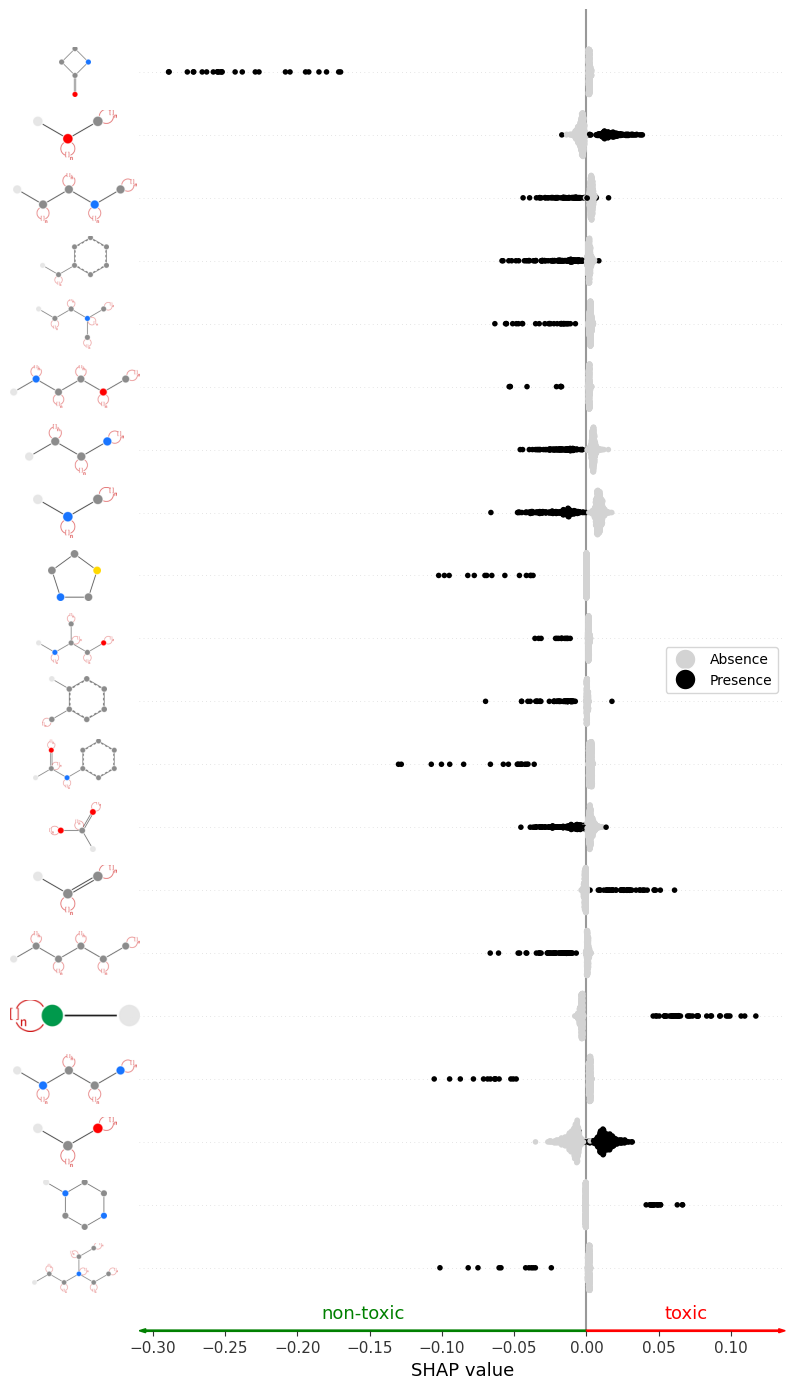

In [24]:
summary_legacy(shapValuesTrain, feature_names=X.columns.values, cmap=myC,
                  features_imgPath="imgSMARTS" ,plot_size=(8,14), show=True, color_bar=True,
                  custom_order=functionSorting, color=myC)

In [48]:
fig=waterfall(shapValuesTrain[401], features_imgPath="imgSMARTS",
          colorNeg=np.array((24,138,59))/255, colorPos="red", show=False)
plt.close(fig)

## Potential correlation ?

In [71]:
sortShapVidxs=functionSorting(shapValuesTrain.values)[::-1]

In [72]:
sortShapV=shapValuesTrain.values[sortShapVidxs]

In [75]:
sortX=X.iloc[:,sortShapVidxs]

In [77]:
sortX.sum(axis=0)[:10]

192     26
510    203
531     79
508    150
653     31
882      9
517    121
507    198
167     14
823     14
dtype: int64